# Model Training

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00


In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Train/test split
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import data

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 2. Preprocessing Pipeline

## 2.1 Feature Selection: Set up the X(independent)  and y(dependent) variables.

X(independent), called the feature matrix, and the matrix contains the features that the model will be using to make predictions.


---



y(dependant) variable/s, also known as the target variables, and it contains the labels that the model is trying to predict.

We will be setting "math_score" as our target variable.

In [5]:
X = df.drop(columns='math_score', axis=1)
y = df['math_score']

## 2.2  Feature Transformation: Apply transformers to numeric and categorical features

#### Why do we need this?

This is crucial when dealing with unfiltered datasets because in the real world, data extracted is rarely in cleaned format. Numerical data have different means and ranges, and categorical features can't be used in machine learning models as it requires numerical data.




---


Applying transformers (StandardScalar and OneHotEncoder):

StandardScalar: standardizes all numerical features, so that all features have mean 0 and standard deviation of 1.

OneHotEncoder: Easy to use here since not that many categorical features. It represents each categorical feature as a sparse matrix

In [6]:
# extract numerical and categorical features
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

# Create transformer
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [7]:
X = preprocessor.fit_transform(X)


In [8]:
X.shape

(1000, 19)

## 2.3 Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. Model Training and Evaluation

## 3.1 Define Evaluation Function

#### Mean Absolute Error:

average of the absolute differences between predicted and actual values. It measures the magnitude of errors in a set of predictions, without considering their direction. doesn't penalize large errors since not squaring (linear).



#### Mean Squared Error:

- How far each prediction is from the actual value, squares the differences, and finds the average of the squared differences.
- Penalizes large errors, sensitive to noise.

#### R2
- explains the % of variance explained by the relationship between two variables.

In [10]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2 = r2_score(true, predicted)

  return mae, rmse, r2

## 3.2 Train and Evaluate Model Performance

In [11]:
# create model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

# loop to use every model in model dictionary
for i in range(len(models)):
  model = list(models.values())[i]
  # train the model to learn relationship between feature variables and target variable.
  model.fit(X_train, y_train)

  # make predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # evaluate model performance on training and testing set
  model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  print('\n')
  model_list.append(list(models.keys())[i])

  print("Model Performance for Training Set.")
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print("Model Performance for Testing Set.")
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression


Model Performance for Training Set.
- Mean Absolute Error: 4.3198
- Root Mean Squared Error: 5.4018
- R2 Score: 0.8705
----------------------------------
Model Performance for Testing Set.
- Mean Absolute Error: 3.9845
- Root Mean Squared Error: 5.0618
- R2 Score: 0.8956


Lasso


Model Performance for Training Set.
- Mean Absolute Error: 5.2418
- Root Mean Squared Error: 6.6245
- R2 Score: 0.8053
----------------------------------
Model Performance for Testing Set.
- Mean Absolute Error: 5.0935
- Root Mean Squared Error: 6.4650
- R2 Score: 0.8297


Ridge


Model Performance for Training Set.
- Mean Absolute Error: 4.3195
- Root Mean Squared Error: 5.4001
- R2 Score: 0.8706
----------------------------------
Model Performance for Testing Set.
- Mean Absolute Error: 3.9876
- Root Mean Squared Error: 5.0657
- R2 Score: 0.8954


K-Neighbors Regressor


Model Performance for Training Set.
- Mean Absolute Error: 4.6958
- Root Mean Squared Error: 5.9056
- R2 Score: 0.8453

## Indiciation of good performance of a model
- Low MAE/RMSE score
- High R2 score



---

## Indiciation of bad performance of a model
- High/er MAE/RMSE score
- Low/er R2 score

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.895607
2,Ridge,0.895447
7,CatBoosting Regressor,0.876273
5,Random Forest Regressor,0.856020
8,AdaBoost Regressor,0.839754
6,XGBRegressor,0.836210
1,Lasso,0.829706
3,K-Neighbors Regressor,0.806094
4,Decision Tree,0.754436


## 4. Interpretation

From the dataframe we can conclude that the Linear Regression model has the highest R2 score of **89.5607%**. In other words, linear regression explains 89.5607% of the variance in the target variable. Therefore, we can say that  linear regression is highly effective at capturing the relationship between the feature variables and the target variable.


---


The Ridge model comes in close second with a R2 score of 0.895447. It is also highly effective at capturing the relationship between the features and the target with the added benefit of regularization to prevent overfitting.


---

Looking at MAE and RMSE scores:

Linear Regression
- MAE: 4.3198
- RMSE: 5.4018

Ridge
- MAE: 4.3195
- RMSE: 5.4001



---

In conclusion, with the MAE, RMSE, and R2 scores of the linear regression and the ridge model being almost identical, I will end up picking the Ridge model because Ridge models have the added benefit of regularization, which helps prevent overfitting. Therefore Ridge models will be generally more stable and robust when applied to new, unseen data. This can lead to better generalization performance in real-world applications.




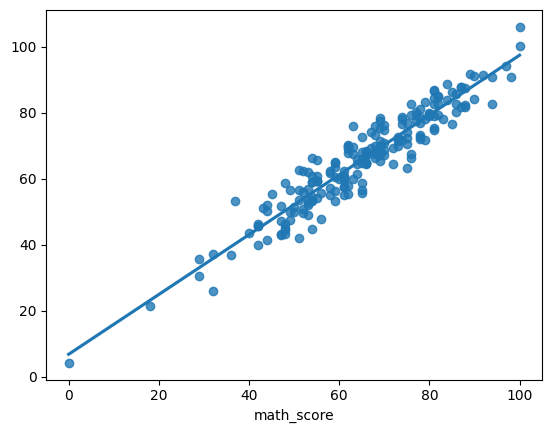

In [29]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# visualize the Ridge Model
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.show()

## 4.1 Interpretation

The alignment of most points closely along the regression line suggests that the model's predictions are generally accurate, as the predicted values closely match the actual values. The consistency of points along the line indicates a strong positive linear relationship, where higher actual math scores correspond to higher predicted math scores. The absence of a significant spread around the line further implies that the model has low prediction errors, indicating good model performance.

array([ 59.47977923,  60.05225478,  64.69300535,  50.3412395 ,
        47.90329726,  43.33649805,  41.63676296,  42.16446285,
        76.09919806,  84.94826406,  65.59096669,  46.38021037,
        67.50143611,  69.39732094,  72.7754518 ,  72.3139421 ,
        91.04484384,  82.42118659,  53.36885323,  44.69365499,
        87.77385694,  73.4687749 ,  67.2768637 ,  59.98229408,
        43.46197719,  59.51980445,  62.35668751,  61.43549981,
        58.66495012,  64.7467084 ,  49.9834857 ,  67.58131216,
        54.18097419,  60.76310923,  54.57117148,  81.8800055 ,
        62.26835719,  59.38211844,  68.80092554,  85.13545276,
        82.70080731,  72.03564076,  65.90102441,  76.20053922,
        83.45110544,  82.75181019,  56.64931015,  62.43990422,
        55.71816628,  87.48827741,  86.87516263,  94.33935449,
        66.23256806,  86.74992866,  68.04644923,  53.17156778,
        67.90447489,  67.17096443,  57.47706405,  90.90253766,
        53.6178884 ,  59.03968275,  46.46386917,  52.85